# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
print(df.shape)
print(df.columns)

(1562, 19)
Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')


In [5]:
#rename columns
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Social Support', 
            'Healthy life expectancy at birth': 'Healthy Life Expectancy', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Standard deviation of ladder by country-year': 'Satisfaction STD',
            'Standard deviation/Mean of ladder by country-year': 'Satisfaction Variability',
            'GINI index (World Bank estimate), average 2000-15': "Avg GINI 2000-15",
            'gini of household income reported in Gallup, by wp5-year': 'Gallup GINI 5-Year',
           }
df = df.rename(renaming, axis=1)
df.head()

,country,year,Happiness,LogGDP,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence in national government,Democratic Quality,Delivery Quality,Satisfaction STD,Satisfaction Variability,GINI index (World Bank estimate),Avg GINI 2000-15,Gallup GINI 5-Year
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [6]:
df.dtypes

country                               object
year                                   int64
Happiness                            float64
LogGDP                               float64
Social Support                       float64
Healthy Life Expectancy              float64
Freedom                              float64
Generosity                           float64
Corruption                           float64
Positive                             float64
Negative                             float64
Confidence in national government    float64
Democratic Quality                   float64
Delivery Quality                     float64
Satisfaction STD                     float64
Satisfaction Variability             float64
GINI index (World Bank estimate)     float64
Avg GINI 2000-15                     float64
Gallup GINI 5-Year                   float64
dtype: object

In [7]:
df.describe()

,year,Happiness,LogGDP,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence in national government,Democratic Quality,Delivery Quality,Satisfaction STD,Satisfaction Variability,GINI index (World Bank estimate),Avg GINI 2000-15,Gallup GINI 5-Year
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [8]:
nan_count = np.sum(df.isnull())
nan_count

country                                0
year                                   0
Happiness                              0
LogGDP                                27
Social Support                        13
Healthy Life Expectancy                9
Freedom                               29
Generosity                            80
Corruption                            90
Positive                              18
Negative                              12
Confidence in national government    161
Democratic Quality                   171
Delivery Quality                     171
Satisfaction STD                       0
Satisfaction Variability               0
GINI index (World Bank estimate)     979
Avg GINI 2000-15                     176
Gallup GINI 5-Year                   357
dtype: int64

In [9]:
# Dropping "GINI index (World Bank estimate)" column due to too many missing values
df.drop('GINI index (World Bank estimate)', axis=1, inplace=True)
df.shape

(1562, 18)

In [10]:
nan_count =np.sum(df.isnull())
nan_count

country                                0
year                                   0
Happiness                              0
LogGDP                                27
Social Support                        13
Healthy Life Expectancy                9
Freedom                               29
Generosity                            80
Corruption                            90
Positive                              18
Negative                              12
Confidence in national government    161
Democratic Quality                   171
Delivery Quality                     171
Satisfaction STD                       0
Satisfaction Variability               0
Avg GINI 2000-15                     176
Gallup GINI 5-Year                   357
dtype: int64

In [11]:
# get list of features with missing values
missing_features = list(df.columns[df.isnull().any()])
# double checking all the features are numeric
for feature in missing_features:
    print(f"Datatype of {feature}: {df[feature].dtype}")

Datatype of LogGDP: float64
Datatype of Social Support: float64
Datatype of Healthy Life Expectancy: float64
Datatype of Freedom: float64
Datatype of Generosity: float64
Datatype of Corruption: float64
Datatype of Positive: float64
Datatype of Negative: float64
Datatype of Confidence in national government: float64
Datatype of Democratic Quality: float64
Datatype of Delivery Quality: float64
Datatype of Avg GINI 2000-15: float64
Datatype of Gallup GINI 5-Year: float64


In [12]:
# Replace rest of the missing values with the mean value (since all features are numerical, no need to leave out features)
for feature in missing_features:
    mean = df[feature].mean()
    df[feature].fillna(value=mean, inplace=True)

In [13]:
# Double check all missing values are replaced
for colname in missing_features:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

LogGDP missing values count :0
Social Support missing values count :0
Healthy Life Expectancy missing values count :0
Freedom missing values count :0
Generosity missing values count :0
Corruption missing values count :0
Positive missing values count :0
Negative missing values count :0
Confidence in national government missing values count :0
Democratic Quality missing values count :0
Delivery Quality missing values count :0
Avg GINI 2000-15 missing values count :0
Gallup GINI 5-Year missing values count :0


In [14]:
# View unique countries
unique_countries = df['country'].unique()
print(unique_countries)
num_unique_countries = df['country'].nunique()
print(num_unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Macedonia' 'Madagascar' 'Malawi' 'Ma

In [15]:
# Dropping country feature, too many unique values
df.drop(columns="country", axis=1, inplace=True)
df.head()

,year,Happiness,LogGDP,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Positive,Negative,Confidence in national government,Democratic Quality,Delivery Quality,Satisfaction STD,Satisfaction Variability,Avg GINI 2000-15,Gallup GINI 5-Year
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.386948,0.445204
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.386948,0.441906
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.386948,0.327318
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.386948,0.336764
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.386948,0.344540


In [16]:
# view the correlation of the features to the label
corrs = df.corr()['Confidence in national government']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

Confidence in national government    1.000000
Freedom                              0.382096
Generosity                           0.259434
Gallup GINI 5-Year                   0.153270
Positive                             0.137078
Avg GINI 2000-15                     0.047297
Satisfaction Variability            -0.016708
year                                -0.018198
Delivery Quality                    -0.042497
Happiness                           -0.082552
Democratic Quality                  -0.129473
Negative                            -0.146214
LogGDP                              -0.153403
Social Support                      -0.155389
Satisfaction STD                    -0.172399
Healthy Life Expectancy             -0.185814
Corruption                          -0.412846
Name: Confidence in national government, dtype: float64

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [17]:
# YOUR CODE HERE
y = df["Confidence in national government"]
X = df.drop(columns="Confidence in national government")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=123)

In [19]:
print(X_train.shape)
print(X_test.shape)

(1046, 16)
(516, 16)


In [20]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_r2 = r2_score(y_test, knn_pred)
print(f"[KNN] Root Mean Squared Error: {knn_rmse}")
print(f"[KNN] R2: {knn_r2}")

[KNN] Root Mean Squared Error: 0.14573972978663102
[KNN] R2: 0.34211004734638684


In [21]:
# Create and fit the  LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the test data 
linear_pred = model.predict(X_test)
lr_rmse = mean_squared_error(y_test, linear_pred, squared=False)
lr_r2 = r2_score(y_test, linear_pred)
print(f"[LR] Root Mean Squared Error: {lr_rmse}")
print(f"[LR] R2: {lr_r2}")

[LR] Root Mean Squared Error: 0.14069722866084813
[LR] R2: 0.38684761738027384


### Stacking

In [22]:
estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

params = {
    "DT__max_depth": [2, 4, 8],
    "GBDT__n_estimators":[100,300]
    
}

stacking = StackingRegressor(estimators=estimators)
stack_grid = GridSearchCV(stacking, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)
print(stack_grid.best_params_)
stack_grid.cv_results_['mean_test_score']


print("best parameters:", stack_grid.best_params_)

rmse_stack_cv = -1*stack_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:   15.5s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   24.5s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   32.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   32.1s finished


{'DT__max_depth': 4, 'GBDT__n_estimators': 300}
best parameters: {'DT__max_depth': 4, 'GBDT__n_estimators': 300}
[STACK] RMSE for the best model is : 0.11


In [23]:
best_estimators = [
    ("DT", DecisionTreeRegressor(max_depth=4)),
    ("RF", RandomForestRegressor()),
    ("GBDT", GradientBoostingRegressor(n_estimators=300)),
    ("LR", LinearRegression())
]
stacking_best_model = StackingRegressor(best_estimators)
stacking_best_model.fit(X_train, y_train)
stacking_best_pred = stacking_best_model.predict(X_test)
stacking_rmse = mean_squared_error(y_test, stacking_best_pred, squared=False)
stacking_r2 = r2_score(y_test, stacking_best_pred)

print('Root Mean Squared Error: {0}'.format(stacking_rmse))
print('R2: {0}'.format(stacking_r2))      

Root Mean Squared Error: 0.10005905047633407
R2: 0.6898940576069954


### Gradient Boosting Regressor

In [24]:
# Perform grid search for best hyperparameters
param_grid_gbdt = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
}
gbdt_model = GradientBoostingRegressor()
grid_search_gbdt = GridSearchCV(estimator=gbdt_model, param_grid=param_grid_gbdt, 
                           scoring='neg_root_mean_squared_error', 
                           cv=5, verbose=2, n_jobs=-1)
grid_search_gbdt.fit(X_train, y_train)
print("Best Parameters:", grid_search_gbdt.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   33.7s finished


Best Parameters: {'max_depth': 3, 'n_estimators': 500}


In [25]:
# Creating gbdt model
gbdt_model = GradientBoostingRegressor(max_depth=3, n_estimators=500)
gbdt_model.fit(X_train, y_train)

# 1. Use predict() to test use the fitted model to make predictions on the test data
# YOUR CODE HERE
y_gbdt_pred = gbdt_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error() 
# YOUR CODE HERE
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

# 3. Compute the R2 score using r2_score()
# YOUR CODE HERE
gbdt_r2 = r2_score(y_test, y_gbdt_pred)
           

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.10171607596774442
[GBDT] R2: 0.6795380072954949


### Random Forest


In [26]:
# Perform grid search
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              scoring='neg_mean_squared_error', 
                              cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 200}


In [27]:
# Create rf model
rf_model = RandomForestRegressor(max_depth=20, n_estimators=200, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

# 1. Use predict() to test use the fitted model to make predictions on the test data
# YOUR CODE HERE
y_rf_pred = rf_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
# YOUR CODE HERE
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

# 3. Compute the R2 score using r2_score()
# YOUR CODE HERE
rf_r2 = r2_score(y_test, y_rf_pred)

                   
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))    
                   

[RF] Root Mean Squared Error: 0.1107136757204868
[RF] R2: 0.6203356028407896


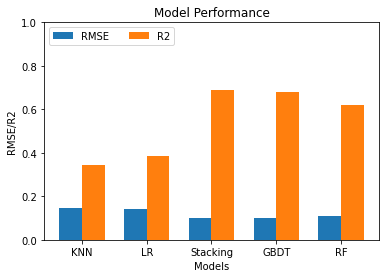

In [28]:
RMSE_Results = [knn_rmse, lr_rmse, stacking_rmse, gbdt_rmse, rf_rmse]
R2_Results = [knn_r2, lr_r2, stacking_r2, gbdt_r2, rf_r2]
labels = ['KNN', 'LR', 'Stacking', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


# Result
Stacking performed the best with .100 RMSE and .68989 R2 score
